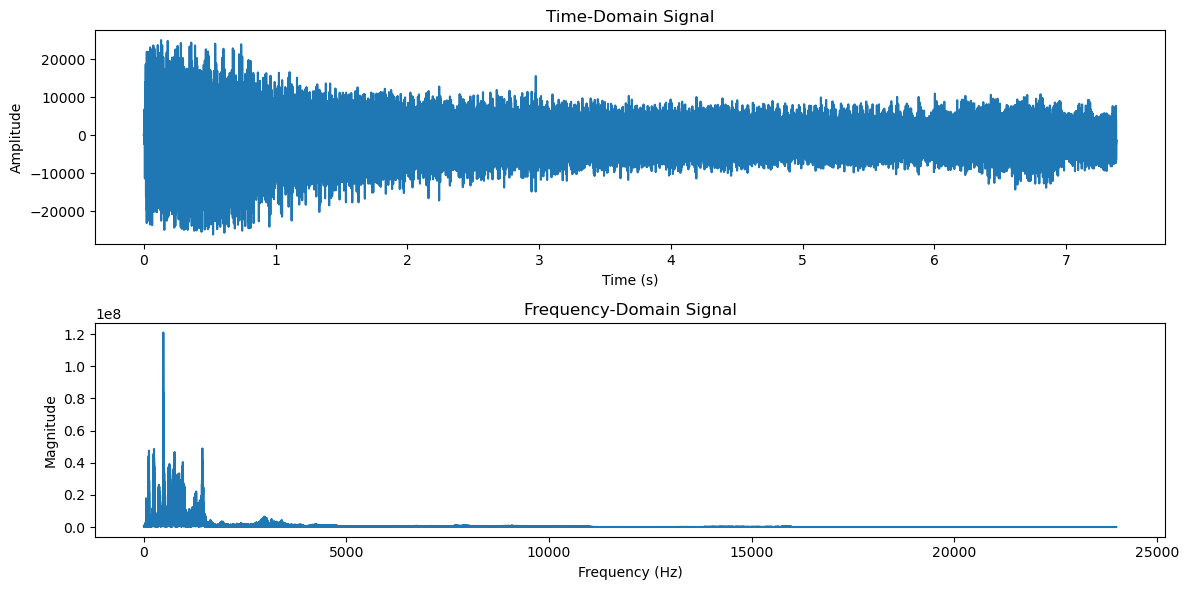

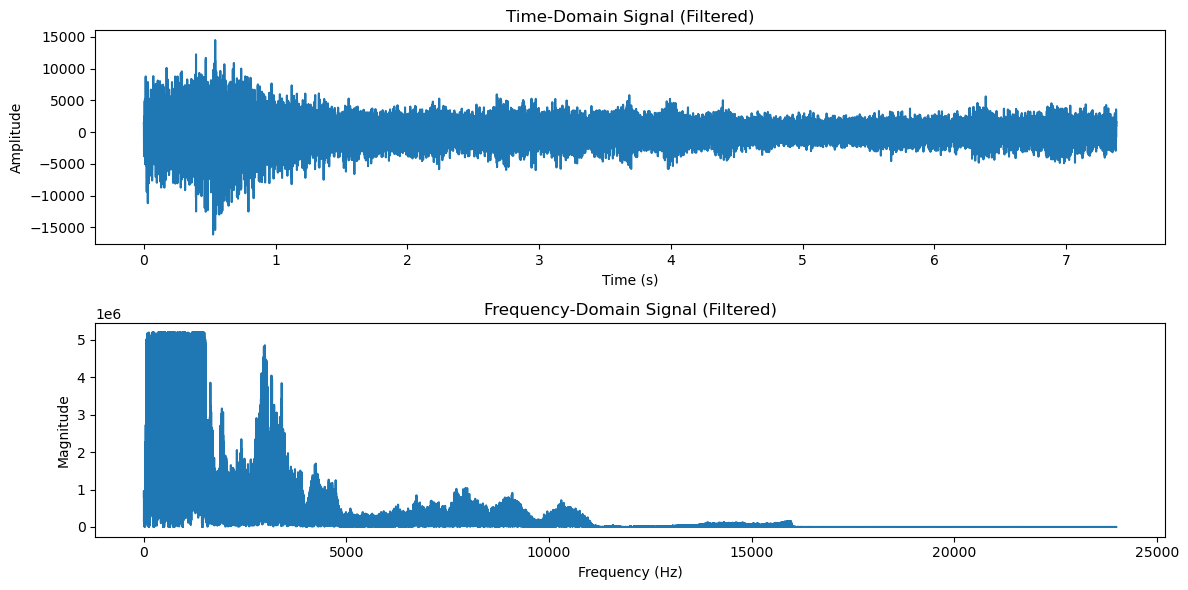

Filtered audio saved to: filtered_audio_subtle.wav


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftfreq

# Step 1: Load the Audio File
file_path = r"C:\Users\dtjab\Downloads\11.wav"  # Replace with your file's path
sample_rate, audio_data = wavfile.read(file_path)

# Step 2: Stereo to Mono Conversion
if len(audio_data.shape) == 2:  # Check if the audio is stereo
    audio_data = np.mean(audio_data, axis=1)  # Convert to mono

# Step 3: Extract Time Parameters
duration = len(audio_data) / sample_rate
time = np.linspace(0, duration, len(audio_data))

# Step 4: Apply Fourier Transform
freqs = fftfreq(len(audio_data), d=1/sample_rate)
fft_values = fft(audio_data)

# Step 5: Visualize Time-Domain Signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, audio_data)
plt.title("Time-Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Step 6: Visualize Frequency-Domain Signal
magnitude = np.abs(fft_values)
plt.subplot(2, 1, 2)
plt.plot(freqs[:len(freqs)//2], magnitude[:len(magnitude)//2])
plt.title("Frequency-Domain Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

# Step 7: Subtle Noise Reduction
# Define a very low threshold for filtering
threshold = np.max(magnitude) * 0.1

# Smoothly attenuate frequencies below the threshold
attenuation_factor = np.exp(-(magnitude / threshold)**2)  # Gaussian attenuation
smoothed_fft_values = fft_values * attenuation_factor

# Step 8: Inverse FFT to Obtain Filtered Signal
filtered_audio_data = ifft(smoothed_fft_values).real

# Step 9: Save and Visualize Filtered Signal
output_path = "filtered_audio_subtle.wav"
wavfile.write(output_path, sample_rate, filtered_audio_data.astype(np.int16))

# Plot the time-domain and frequency-domain signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, filtered_audio_data)
plt.title("Time-Domain Signal (Filtered)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

filtered_magnitude = np.abs(smoothed_fft_values)
plt.subplot(2, 1, 2)
plt.plot(freqs[:len(freqs)//2], filtered_magnitude[:len(filtered_magnitude)//2])
plt.title("Frequency-Domain Signal (Filtered)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

print(f"Filtered audio saved to: {output_path}")
